<a href="https://colab.research.google.com/github/islavathnaveennaik/PROJECT-IMDB-Sentiment-Analysis/blob/main/IMDB_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis of IMDB reviews


**Importing the data**


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Specify the encoding as 'latin-1' when reading the CSV file
df = pd.read_csv('/content/IMDB-Dataset.csv', encoding='latin-1')

In [6]:
df.head()
df = df.sample(10000)


In [7]:
# Review Frquency Count
vc_df = pd.DataFrame(df['sentiment'].value_counts()).reset_index()
vc_df.columns = ['Sentiment', 'Count']
vc_df['Sentiment'] = vc_df['Sentiment'].map({1 : 'positive', 0: 'negative'})
vc_df

,Sentiment,Count
0,NaN,5054
1,NaN,4946


In [8]:
df.head()

,review,sentiment
20307,I was adopted at birth and certainly did NOT h...,positive
35040,"""National Lampoon Goes to the Movies"" (1981) i...",negative
24636,Caught this movie on the tube on a Sunday. I t...,negative
8776,I've seen several stage and film adaptations o...,negative
22270,So you think a talking parrot is not your cup ...,positive


#Pre-processing the data


**Some common Problems:
1. Remove Punctuation
2. Replace short words
3. Making text lower case
4. Remove stopwords
5. Lemmatization**

#Removing punctuation (.!<>{}’,”(/)-)


In [9]:
df['review']

,review
20307,I was adopted at birth and certainly did NOT h...
35040,"""National Lampoon Goes to the Movies"" (1981) i..."
24636,Caught this movie on the tube on a Sunday. I t...
8776,I've seen several stage and film adaptations o...
22270,So you think a talking parrot is not your cup ...
...,...
2120,This is an amazing movie from 1936. Although t...
10289,This movie is painful. That's probably the bes...
22335,I usually don't consider turning a movie off u...
22905,Title: Robot Jox (1990) <br /><br />Director: ...


In [10]:
# Replacing punctuations with space
df['review_processed'] = df['review'].str.replace("[^a-zA-Z0-9]", " ")

# Re ordering columns
df = df[['review','review_processed','sentiment']]

In [11]:
df['review_processed']

,review_processed
20307,I was adopted at birth and certainly did NOT h...
35040,"""National Lampoon Goes to the Movies"" (1981) i..."
24636,Caught this movie on the tube on a Sunday. I t...
8776,I've seen several stage and film adaptations o...
22270,So you think a talking parrot is not your cup ...
...,...
2120,This is an amazing movie from 1936. Although t...
10289,This movie is painful. That's probably the bes...
22335,I usually don't consider turning a movie off u...
22905,Title: Robot Jox (1990) <br /><br />Director: ...


#italicized text#### Lowercase charace


In [15]:
"NAVEEN" == "Naveen"

False

In [16]:
word = "Naveen"
word.lower()

'naveen'

In [17]:
# make entire text lowercase
df['review_processed'] = [row.lower() for row in df['review_processed']]

In [18]:
df['review_processed']

,review_processed
20307,i was adopted at birth and certainly did not h...
35040,"""national lampoon goes to the movies"" (1981) i..."
24636,caught this movie on the tube on a sunday. i t...
8776,i've seen several stage and film adaptations o...
22270,so you think a talking parrot is not your cup ...
...,...
2120,this is an amazing movie from 1936. although t...
10289,this movie is painful. that's probably the bes...
22335,i usually don't consider turning a movie off u...
22905,title: robot jox (1990) <br /><br />director: ...


#Remove stop words


In [21]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
# Download the 'punkt_tab' data package
nltk.download('punkt_tab') # This line is added to download the missing data
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english') # extracting all the stop words in english language and storing it in a variable called stop_words -> set

# Making custom list of words to be removed
add_words = ['movie','br','go','film','ugh','one','make','even','see','movies','get','makes','making','time','watch','character', 'like', 'good','well','would','really', 'show', 'look']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['review_processed'] = [remove_stopwords(r) for r in df['review_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [22]:
df['review_processed']

,review_processed
20307,adopted birth certainly problems antwone fishe...
35040,"`` national lampoon goes '' ( 1981 ) , simply ..."
24636,caught tube sunday . thought bad looked imdb o...
8776,'ve seen several stage adaptations alice wonde...
22270,"think talking parrot cup tea huh ? , think . p..."
...,...
2120,amazing 1936. although first hour n't interest...
10289,painful . 's probably best way describe . 's 9...
22335,usually n't consider turning unless 's bad . h...
22905,title : robot jox ( 1990 ) < / > < / > directo...


#Lemmatization


In [24]:
# Begin Lemmatization
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
# Download the 'averaged_perceptron_tagger_eng' data package
nltk.download('averaged_perceptron_tagger_eng') # This line is added to download the missing data
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# ... (rest of your code) ...

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  # output will be a list of tuples -> [(word,detailed_tag)]
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) # output -> [(word,shallow_tag)]
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [25]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk_tagged = nltk.pos_tag(nltk.word_tokenize("This batch is awesome"))
nltk_tagged

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('This', 'DT'), ('batch', 'NN'), ('is', 'VBZ'), ('awesome', 'JJ')]

**1) split sentence into words 2) get the detailed POS for each word 3) get shallow POS from detailed POS 4) do lemmatisation for each word 5) join all the words to form sentence**

In [26]:
df['review_processed']

,review_processed
20307,"adopt birth certainly problem antwone fisher ,..."
35040,"`` national lampoon go `` ( 1981 ) , simply pu..."
24636,caught tube sunday . think bad look imdb other...
8776,'ve see several stage adaptation alice wonderl...
22270,"think talk parrot cup tea huh ? , think . paul..."
...,...
2120,amaze 1936. although first hour n't interestin...
10289,painful . 's probably best way describe . 's 9...
22335,usually n't consider turn unless 's bad . home...
22905,title : robot jox ( 1990 ) < / > < / > directo...


#Plotting Freqent Words


In [27]:
df

,review,review_processed,sentiment
20307,I was adopted at birth and certainly did NOT h...,"adopt birth certainly problem antwone fisher ,...",positive
35040,"""National Lampoon Goes to the Movies"" (1981) i...","`` national lampoon go `` ( 1981 ) , simply pu...",negative
24636,Caught this movie on the tube on a Sunday. I t...,caught tube sunday . think bad look imdb other...,negative
8776,I've seen several stage and film adaptations o...,'ve see several stage adaptation alice wonderl...,negative
22270,So you think a talking parrot is not your cup ...,"think talk parrot cup tea huh ? , think . paul...",positive
...,...,...,...
2120,This is an amazing movie from 1936. Although t...,amaze 1936. although first hour n't interestin...,positive
10289,This movie is painful. That's probably the bes...,painful . 's probably best way describe . 's 9...,negative
22335,I usually don't consider turning a movie off u...,usually n't consider turn unless 's bad . home...,negative
22905,Title: Robot Jox (1990) <br /><br />Director: ...,title : robot jox ( 1990 ) < / > < / > directo...,negative


#WordCloud


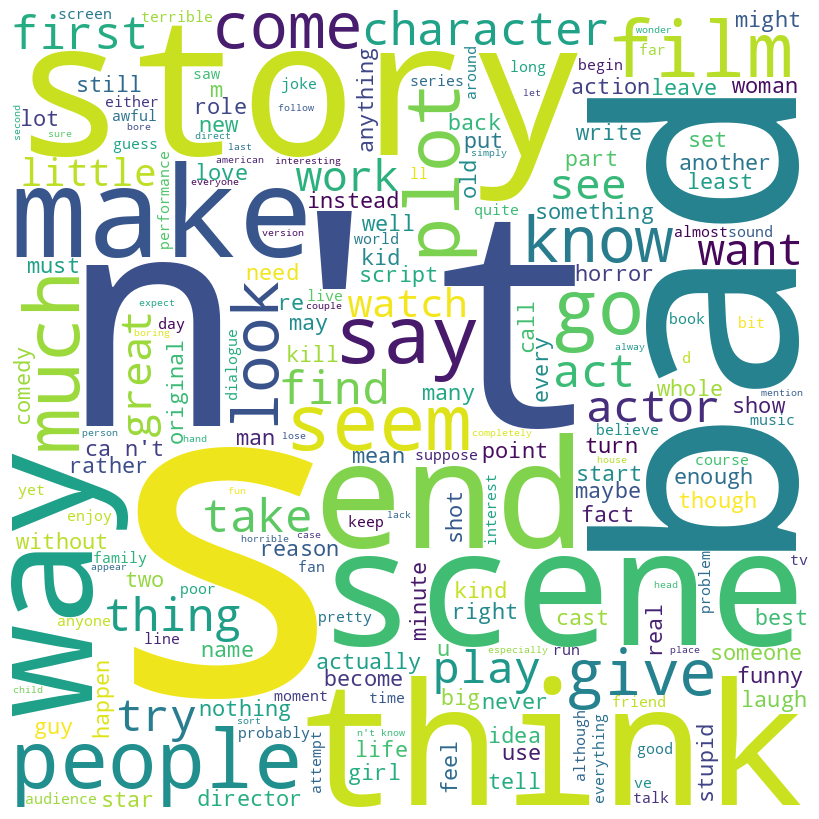

In [28]:
##
## Bilding a Word Cloud
##
from wordcloud import WordCloud
word_cloud_df = df.loc[df['sentiment'] == 'negative',:]
all_words = ' '.join([text for text in word_cloud_df['review_processed']])


wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#Bag of Words Model


In [29]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
# tmp_df = tfidf.fit_transform(df.review_processed)
# feature_names = tfidf.get_feature_names()
# pd.DataFrame(tmp_df.toarray(), columns = feature_names).head()

X = tfidf.fit_transform(df.review_processed).toarray()
y = df.sentiment.map({'positive' : 1, 'negative' : 0}).values
featureNames = tfidf.get_feature_names_out()


X, y


# # # Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=777)

In [30]:
X_train.shape, X_test.shape

((8000, 2500), (2000, 2500))

In [31]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02976918, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.10292144, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#Building the ML model


**Feature Importance**

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
y_pred
#featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)},columns = ['Word','Importance'])

array([0, 0, 1, ..., 1, 1, 1])

In [33]:
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[665 317]
 [326 692]]
The model accuracy is 0.6785


In [35]:
from sklearn.metrics import f1_score
f1_score(y_test, dt.predict(X_test))

0.6827824370991613

In [36]:
##featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
48,0.133759,bad
495,0.038386,waste
220,0.026005,great
47,0.017984,awful
347,0.016185,nothing
...,...,...
17,0.000333,wait
181,0.000250,ex
434,0.000249,sing
507,0.000248,whilst


In [42]:
user_sentence = "Bad movie, one of the worst screenplay. I slept the whole movie. Can somebody ask the actor to stop acting?"
#user_sentence = "One of the not good movies I have ever watched - what was even that ?"

user_sentence = user_sentence.replace(".", " ")
user_sentence = user_sentence.lower()

user_sentence = remove_stopwords(user_sentence)
user_sentence = lemmatize_sentence(user_sentence)

user_sentence

X_test = tfidf.transform([user_sentence]).toarray()
# The line below was changed to use the correct function name dt.predict()
prediction = dt.predict(X_test) # Changed dtpredict to dt.predict
prediction

array([0])